# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [8]:
import pandas as pd
data = pd.read_csv('/content/healthcare_dataset.csv')
data.shape

(55500, 15)

they are 55500 rows and 15 columns

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [9]:
# Calculate the number of unique values in each column
unique_values = data.nunique()

# Find the column with the greatest number of distinct values
most_diverse_column = unique_values.idxmax()
most_diverse_count = unique_values.max()

# If there is a unique identifier, find the column with the next highest diversity
# Assuming "ID" or similar is a unique identifier
potential_unique_id_columns = [col for col in data.columns if "id" in col.lower() or "unique" in col.lower()]
if potential_unique_id_columns:
    for col in potential_unique_id_columns:
        unique_values[col] = -1  # Exclude unique identifier from diversity check

next_most_diverse_column = unique_values.idxmax()
next_most_diverse_count = unique_values.max()

(most_diverse_column, most_diverse_count, next_most_diverse_column, next_most_diverse_count)

('Billing Amount', 50000, 'Billing Amount', 50000)

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [10]:
# Identify columns where all the values are the same
redundant_columns = [col for col in data.columns if data[col].nunique() == 1]

redundant_columns

[]

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

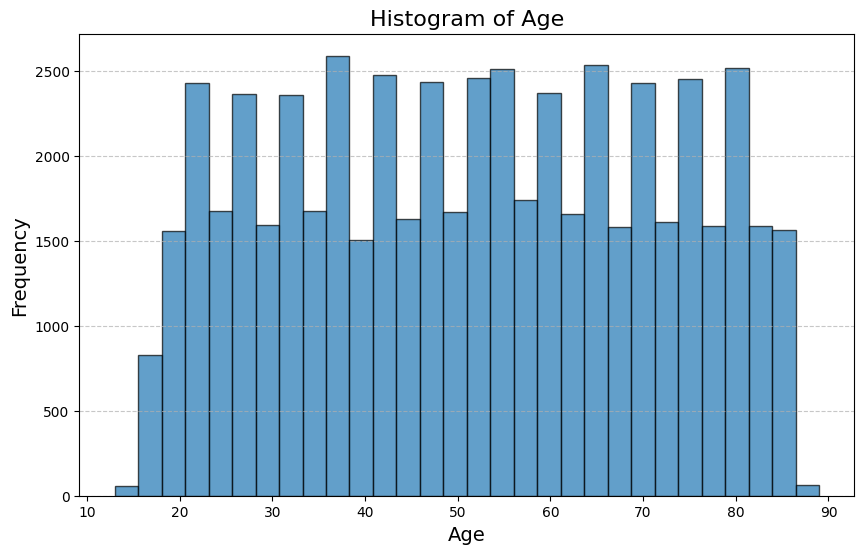

In [11]:
import matplotlib.pyplot as plt

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot a histogram for the first numeric column as an example
# You can change this to any specific numeric column you'd like to analyze
if len(numeric_columns) > 0:
    column_to_plot = numeric_columns[0]
    plt.figure(figsize=(10, 6))
    plt.hist(data[column_to_plot].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f"Histogram of {column_to_plot}", fontsize=16)
    plt.xlabel(column_to_plot, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No numeric columns available for creating a histogram.")

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

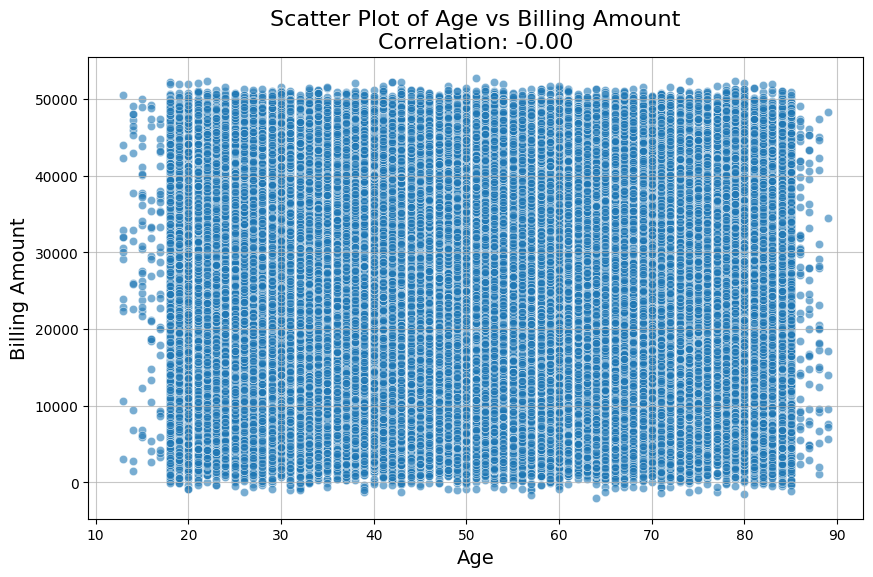

Correlation between Age and Billing Amount: -0.00


In [12]:
import seaborn as sns

# Identify numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Select two numeric columns for correlation analysis
if len(numeric_columns) >= 2:
    col1, col2 = numeric_columns[:2]

    # Calculate correlation
    correlation_value = data[[col1, col2]].corr().iloc[0, 1]

    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[col1], y=data[col2], alpha=0.6)
    plt.title(f"Scatter Plot of {col1} vs {col2}\nCorrelation: {correlation_value:.2f}", fontsize=16)
    plt.xlabel(col1, fontsize=14)
    plt.ylabel(col2, fontsize=14)
    plt.grid(alpha=0.7)
    plt.show()

    # Print correlation value
    print(f"Correlation between {col1} and {col2}: {correlation_value:.2f}")
else:
    print("Not enough numeric columns to perform correlation analysis.")

The scatter plot shows no clear relationship between age and billing amount, as indicated by the correlation of -0.00, suggesting that age does not influence billing amounts. The points are evenly spread across all ages and billing amounts. This indicates that billing amounts are likely driven by factors other than age. The scatter is quite dense, particularly in certain age groups, which may point to a large volume of data points in these ranges.



---



## Submitting Your Work

Submit your work as usual.